In [1]:
import pandas as pd
import statsmodels.api as sm

from utils import plot, apa_latex_est_tabular, REGRESSORS, COUNTRIES_ISO

In [5]:
df = pd.read_csv("./data/wvs/wave7.csv")
df.head()

,group_corruption,is_immigrant,mother_immigrant,father_immigrant,migration_positive,migration_negative,pol_value_1,pol_value_2,pol_value_3,pol_value_4,...,Q292I,Q292J,Q292K,Q292L,Q292M,Q292N,Q292O,Q293,Q294A,Q294B
0,0.333333,0,0,0,0.75,1.00,0,0,0,0,...,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4
1,0.000000,0,1,1,0.75,0.00,0,0,0,0,...,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4
2,0.500000,0,1,1,1.00,0.50,1,0,0,0,...,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4
3,0.333333,1,1,1,0.75,0.75,0,0,0,0,...,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4
4,0.416667,0,1,1,0.75,0.00,0,0,0,0,...,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4


### Final regression runs for the Report
This notebook outputs all the regression results needed. It prints the latex tabular together with the appropriate header and saves the diagnostics in the `plots` directory.

In [6]:
country_ref_iso = "DEU"
# specify the regressions
regressions_exp = [REGRESSORS,
                   [*REGRESSORS,*[f"country_{code}" for code in COUNTRIES_ISO if code != country_ref_iso]],
                   [*REGRESSORS, "wpfi"]]

german_only = [True, False, False]

<>:11: SyntaxWarning: invalid escape sequence '\c'
<>:11: SyntaxWarning: invalid escape sequence '\c'
C:\Users\WordPress\AppData\Local\Temp\ipykernel_17336\2010684077.py:11: SyntaxWarning: invalid escape sequence '\c'
  print(f"\caption\u007b Regressionresult  {i+1}, Adjusted $R^2$: {round(lm.rsquared_adj,3)}\u007d")


Regression run 1------------------------

\caption{ Regressionresult  1, Adjusted $R^2$: 0.205}
\begin{tabular}{llllll}
\toprule
 & Estimate & $\hat\sigma_{\hat\beta}$ & $T_{H_0:\beta=0}$ & p-Value & VIF \\
\midrule
\texttt {const} & 0.416*** & 0.035 & 11.986 & <.001 & 123.517 \\
\texttt {group\_corruption} & 0.352*** & 0.028 & 12.547 & <.001 & 1.084 \\
\texttt {is\_immigrant} & -0.049** & 0.014 & -3.447 & .001 & 2.225 \\
\texttt {mother\_immigrant} & 0.006 & 0.012 & 0.457 & .648 & 2.635 \\
\texttt {father\_immigrant} & 0.001 & 0.013 & 0.058 & .954 & 2.674 \\
\texttt {migration\_positive} & -0.01 & 0.023 & -0.421 & .673 & 1.226 \\
\texttt {migration\_negative} & 0.029 & 0.019 & 1.499 & .134 & 1.216 \\
\texttt {pol\_value\_1} & -0.009 & 0.018 & -0.524 & .601 & 1.094 \\
\texttt {pol\_value\_2} & -0.034* & 0.013 & -2.574 & .01 & 1.119 \\
\texttt {pol\_value\_3} & -0.033*** & 0.009 & -3.54 & <.001 & 1.273 \\
\texttt {pol\_value\_4} & -0.012 & 0.009 & -1.251 & .211 & 1.277 \\
\texttt {pol\_

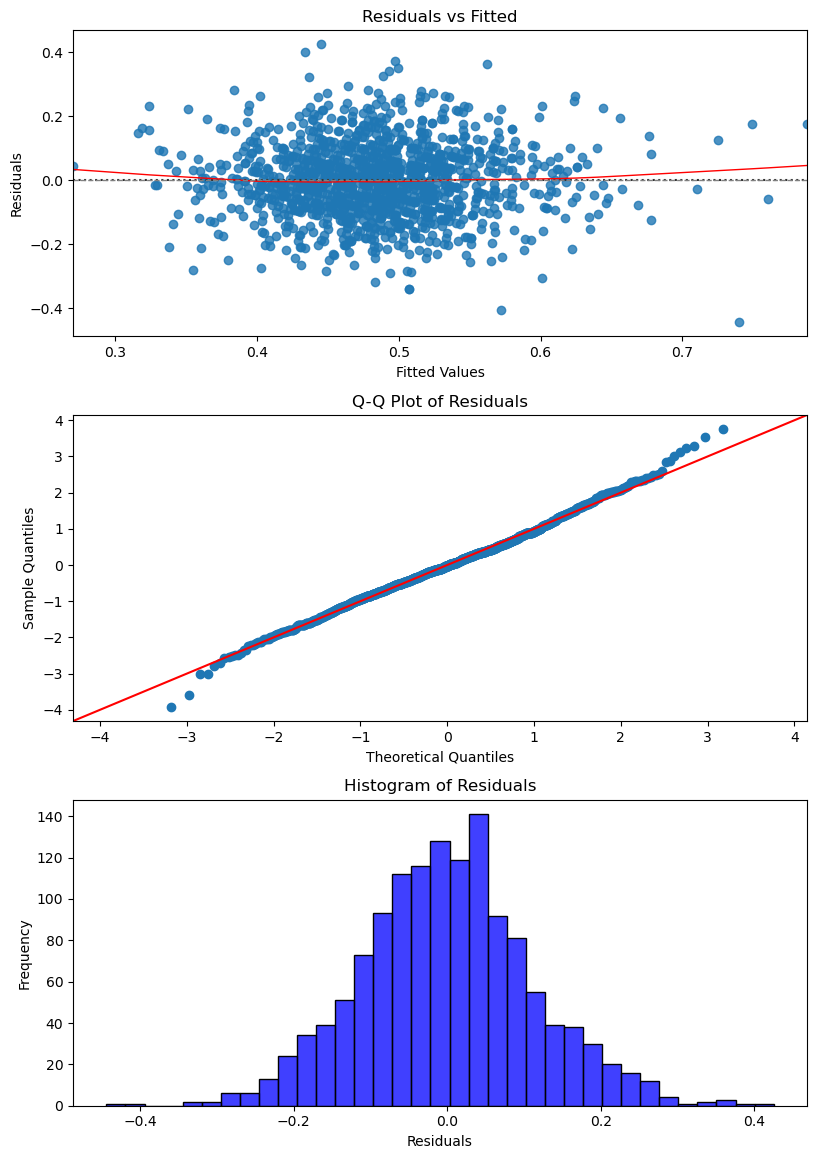

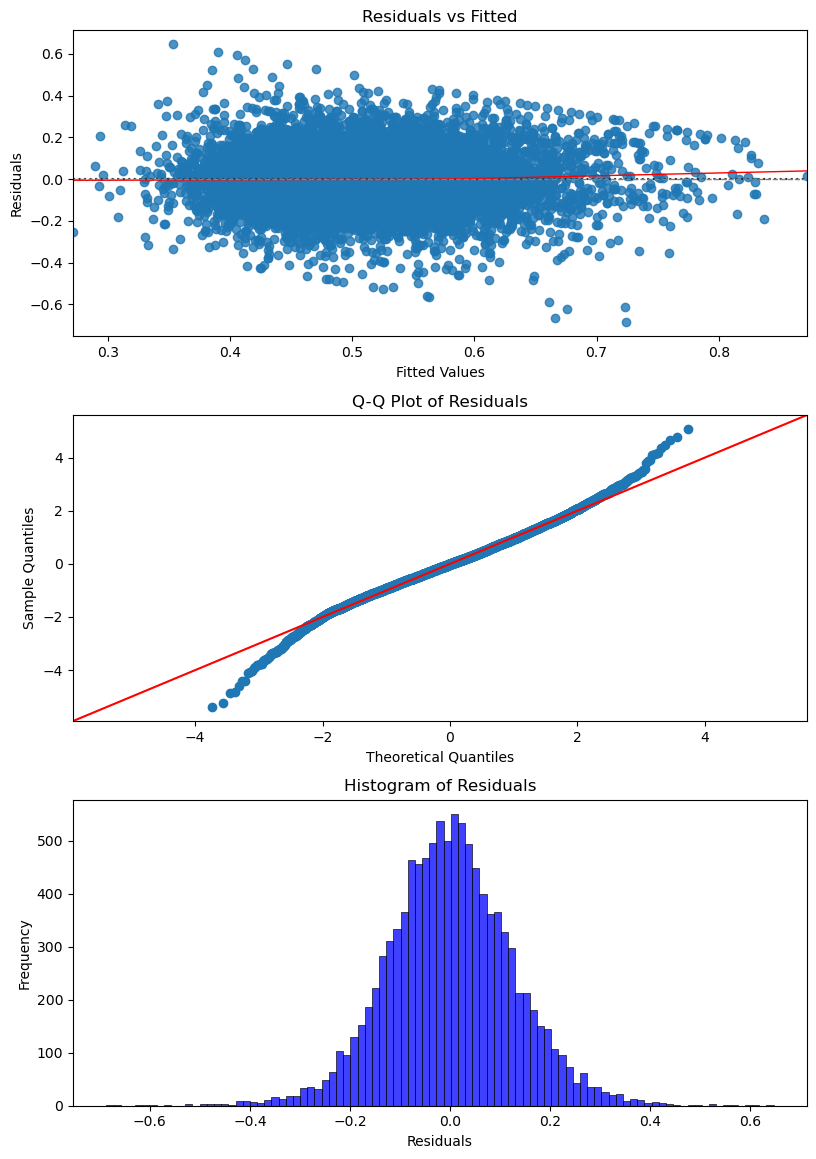

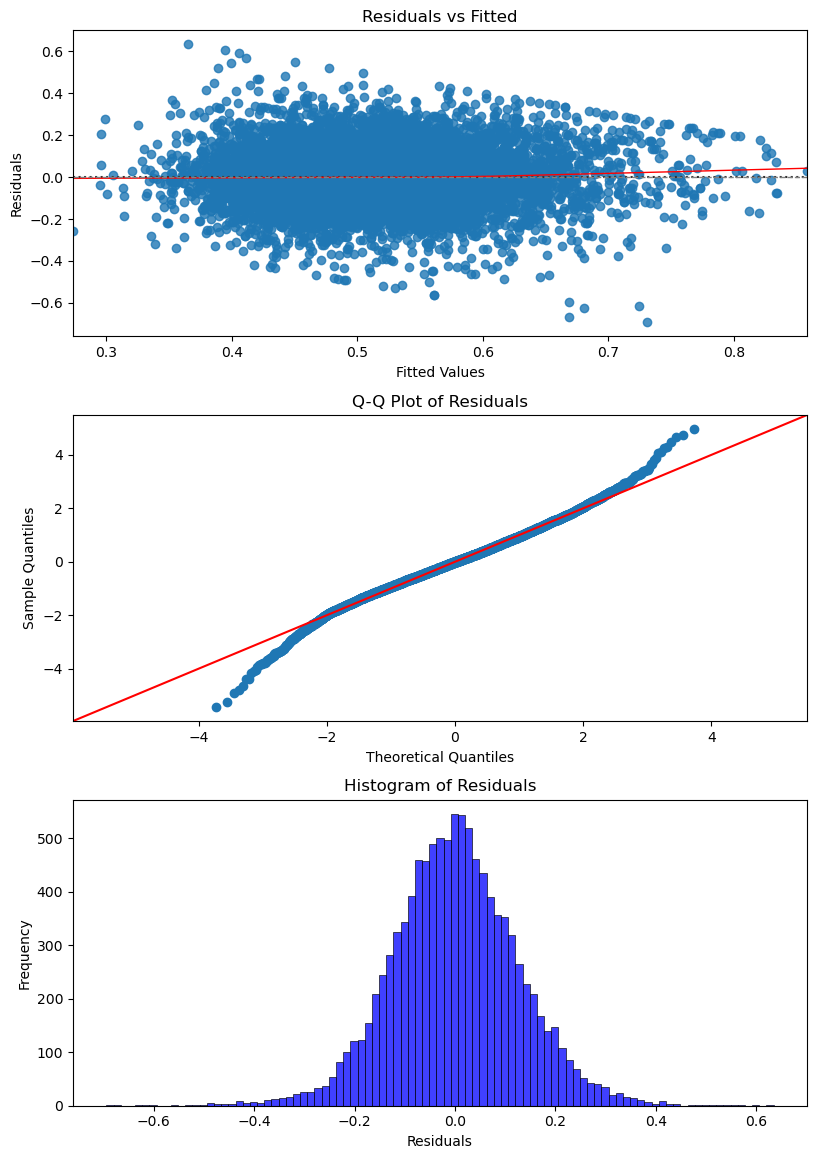

In [7]:
for i in range(len(regressions_exp)):
  X, y = df[regressions_exp[i]], df.national_distrust_index
  X = sm.add_constant(X)
  if german_only[i]:
    german_rows = df.country_DEU == 1
    X,y = X.loc[german_rows, :], y[german_rows]

  lm = sm.OLS(y, X).fit(cov_type="HC0")
  
  print(f"Regression run {i+1}------------------------\n")
  print(f"\caption\u007b Regressionresult  {i+1}, Adjusted $R^2$: {round(lm.rsquared_adj,3)}\u007d")
  apa_latex_est_tabular(lm, X)
  plot(lm, f"regression{i+1}_diag")